In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
chem = pd.read_csv('/home/bhavya/data analysis projects/cosm/chemicals-in-cosmetics-.csv')
chem.head()

,index,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [3]:
chem.shape

(114298, 23)

In [4]:
chem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114298 entries, 0 to 114297
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   114298 non-null  int64  
 1   CDPHId                  114298 non-null  int64  
 2   ProductName             114298 non-null  object 
 3   CSFId                   80382 non-null   float64
 4   CSF                     79958 non-null   object 
 5   CompanyId               114298 non-null  int64  
 6   CompanyName             114298 non-null  object 
 7   BrandName               114082 non-null  object 
 8   PrimaryCategoryId       114298 non-null  int64  
 9   PrimaryCategory         114298 non-null  object 
 10  SubCategoryId           114298 non-null  int64  
 11  SubCategory             114298 non-null  object 
 12  CasId                   114298 non-null  int64  
 13  CasNumber               107902 non-null  object 
 14  ChemicalId          

In [5]:
pd.isnull(chem).sum()

index                          0
CDPHId                         0
ProductName                    0
CSFId                      33916
CSF                        34340
CompanyId                      0
CompanyName                    0
BrandName                    216
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6396
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101390
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111325
ChemicalCount                  0
dtype: int64

In [6]:
chem.dropna(inplace=True)

In [7]:
import datetime

In [8]:
chem['InitialDateReported'] = pd.to_datetime(chem['InitialDateReported'])
chem['MostRecentDateReported'] = pd.to_datetime(chem['MostRecentDateReported'])
chem['DiscontinuedDate'] = pd.to_datetime(chem['DiscontinuedDate'])
chem['ChemicalCreatedAt'] = pd.to_datetime(chem['ChemicalCreatedAt'])
chem['ChemicalUpdatedAt'] = pd.to_datetime(chem['ChemicalUpdatedAt'])
chem['ChemicalDateRemoved'] = pd.to_datetime(chem['ChemicalDateRemoved'])

In [9]:
chem.drop_duplicates(inplace=True)
chem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 516 to 97677
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   95 non-null     int64         
 1   CDPHId                  95 non-null     int64         
 2   ProductName             95 non-null     object        
 3   CSFId                   95 non-null     float64       
 4   CSF                     95 non-null     object        
 5   CompanyId               95 non-null     int64         
 6   CompanyName             95 non-null     object        
 7   BrandName               95 non-null     object        
 8   PrimaryCategoryId       95 non-null     int64         
 9   PrimaryCategory         95 non-null     object        
 10  SubCategoryId           95 non-null     int64         
 11  SubCategory             95 non-null     object        
 12  CasId                   95 non-null     int64  

In [10]:
chem.shape

(95, 23)

In [11]:
chem.set_index('ProductName', inplace = True)

In [12]:
chem['ChemicalCount'].info()

<class 'pandas.core.series.Series'>
Index: 95 entries, Body Lotion SPF-25 to Baked Hydrating Powder Foundation
Series name: ChemicalCount
Non-Null Count  Dtype
--------------  -----
95 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


In [13]:
chem.drop_duplicates(inplace=True)
chem.head(10)

,index,CDPHId,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
ProductName,,,,,,,,,,,,,,,,,,,,,
Body Lotion SPF-25,516,349,1559.0,Tinted,71,"Sunrider Manufacturing, L.P.",Oi-Lin,90,Skin Care Products,102,...,13463-67-7,377,Titanium dioxide,2009-09-02,2013-09-19,2010-01-01,2009-09-02,2013-09-19,2010-01-01,0
Body Lotion SPF-25,521,349,1559.0,Tinted,71,"Sunrider Manufacturing, L.P.",Oi-Lin,106,Sun-Related Products,107,...,13463-67-7,377,Titanium dioxide,2009-09-02,2013-09-19,2010-01-01,2009-09-02,2013-09-19,2010-01-01,0
Nail Polish,5573,1759,2579.0,Pink,118,Added Extras LLC,Topps,59,Nail Products,65,...,140-88-5,2021,Ethyl acrylate,2009-09-29,2010-12-30,2009-01-01,2009-09-29,2009-09-29,2009-01-01,0
Nail Polish,5574,1759,2580.0,Green,118,Added Extras LLC,Topps,59,Nail Products,65,...,140-88-5,2021,Ethyl acrylate,2009-09-29,2010-12-30,2009-01-01,2009-09-29,2009-09-29,2009-01-01,0
Nail Polish,5575,1759,2581.0,Purple,118,Added Extras LLC,Topps,59,Nail Products,65,...,140-88-5,2021,Ethyl acrylate,2009-09-29,2010-12-30,2009-01-01,2009-09-29,2009-09-29,2009-01-01,0
Suave Body Wash Ocean Breeze,15388,3630,22480.0,Ocean Breeze,184,"Conopco, Inc.",Suave,6,Bath Products,159,...,140-67-0,6409,Estragole,2009-10-12,2015-11-19,2010-07-11,2009-10-12,2015-11-19,2010-07-11,0
Suave Body Wash Ocean Breeze,15389,3630,22482.0,Ocean Clean,184,"Conopco, Inc.",Suave,6,Bath Products,159,...,140-67-0,6409,Estragole,2009-10-12,2015-11-19,2010-07-11,2009-10-12,2015-11-19,2010-07-11,0
Bar Soap,21297,5640,22517.0,Arctic Surf,973,Henkel Corporation,Coast,6,Bath Products,159,...,13463-67-7,9522,Titanium dioxide,2009-10-15,2015-11-05,2012-04-01,2009-10-15,2015-11-05,2012-04-01,0
Bar Soap,21299,5640,22518.0,Pacific Force,973,Henkel Corporation,Coast,6,Bath Products,159,...,13463-67-7,9522,Titanium dioxide,2009-10-15,2015-11-05,2012-04-01,2009-10-15,2015-11-05,2012-04-01,1


In [14]:
chem['ChemicalName'] = chem['ChemicalName'].str.replace('Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents','retinol (or equivalent)')

#chem['ChemicalName'] = chem['ChemicalName'].str.replace('Carbon black(airborne, unbound particles of respirable size)','carbon black')

# ANALYSIS

<AxesSubplot:xlabel='ChemicalCount', ylabel='ChemicalName'>

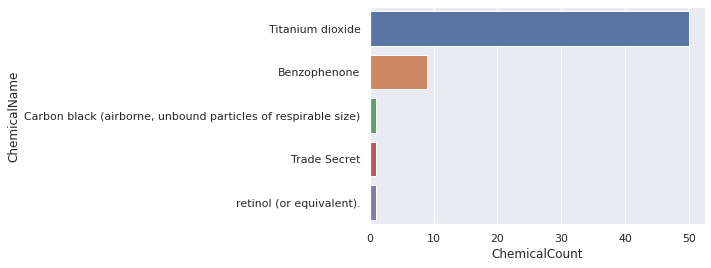

In [15]:
chem_name = chem.groupby(['ChemicalName'], as_index=False)['ChemicalCount'].sum().sort_values(by='ChemicalCount', ascending=False).head()

sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(y='ChemicalName', x='ChemicalCount', data= chem_name)

Titanium dioxide is the most highly found chemical in cosmetics in this data.

<AxesSubplot:xlabel='ChemicalCount', ylabel='BrandName'>

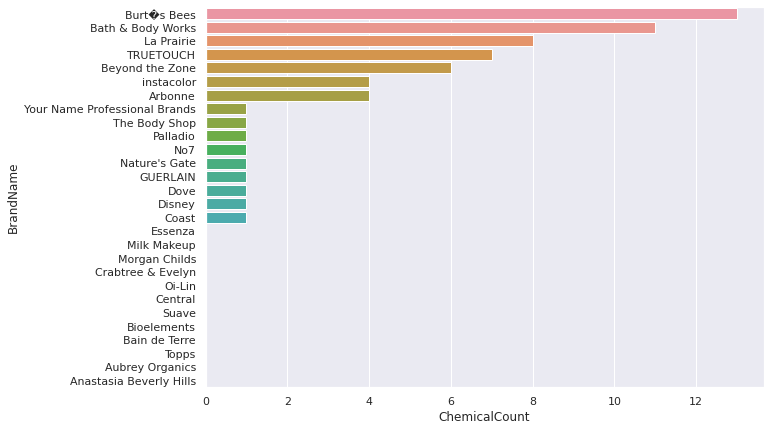

In [16]:
brand_chem = chem.groupby(['BrandName'], as_index=False)['ChemicalCount'].sum().sort_values(by='ChemicalCount',ascending=False)

sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(y='BrandName', x='ChemicalCount', data= brand_chem)

<AxesSubplot:xlabel='ChemicalCount', ylabel='BrandName'>

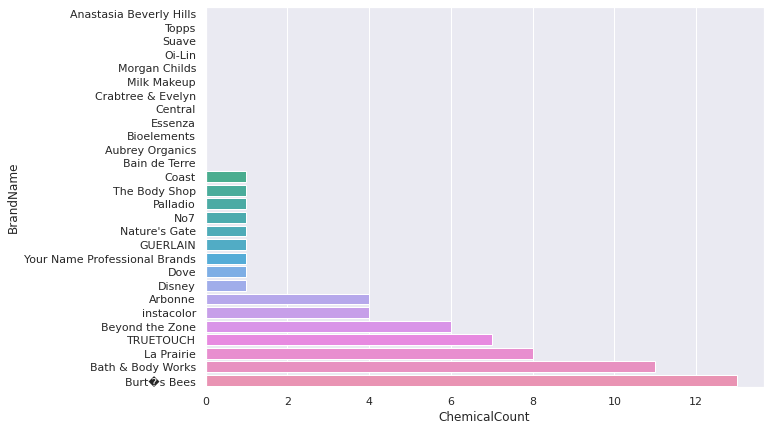

In [17]:
brand_chem = chem.groupby(['BrandName'], as_index=False)['ChemicalCount'].sum().sort_values(by='ChemicalCount',ascending=True)

sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(y='BrandName', x='ChemicalCount', data= brand_chem)

We can see that Burts and Bees uses the most amount of chemicals, and the least amount of chemicals is used by Anastasia Beverly Hills.

<AxesSubplot:xlabel='ChemicalCount', ylabel='PrimaryCategory'>

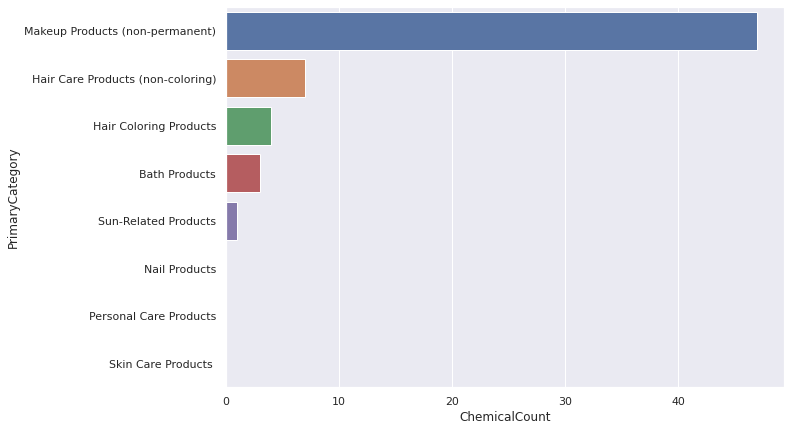

In [18]:
prod_cat = chem.groupby(['PrimaryCategory'], as_index=False)['ChemicalCount'].sum().sort_values(by='ChemicalCount',ascending=False)

sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(y='PrimaryCategory', x='ChemicalCount', data= prod_cat)

In [47]:
chem['PrimaryCategory'].value_counts()

Makeup Products (non-permanent)      47
Bath Products                        16
Hair Care Products (non-coloring)    14
Hair Coloring Products                5
Skin Care Products                    4
Personal Care Products                4
Nail Products                         3
Sun-Related Products                  2
Name: PrimaryCategory, dtype: int64

Here, we can see that makeup products are the most listed product category in this data. 
So, one may conclude that in all the product categories, chemicals are found the most in makeup products, and least found in skincare, nail and personal care products according to the above graph.

In [45]:
# report_date = chem.groupby(['BrandName'])['MostRecentDateReported'].sort_values(by='BrandName', ascending=True)
# sns.lineplot(y='MostRecentDateReported', x='BrandName', data = report_date)

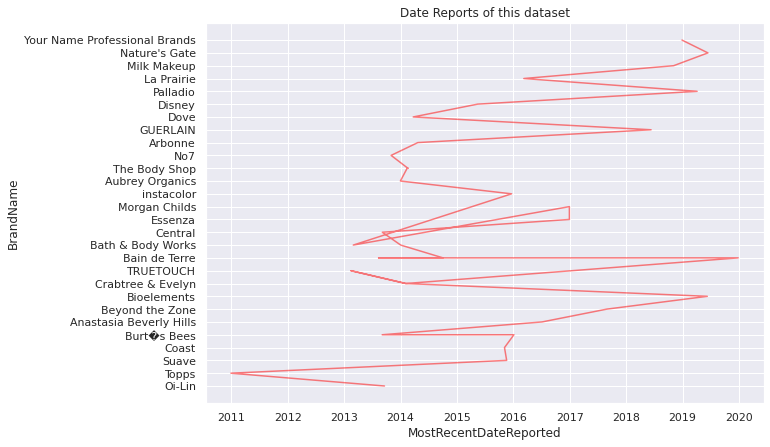

In [37]:
plt.plot(chem.MostRecentDateReported,chem.BrandName,color='red',alpha=0.5)
plt.title('Date Reports of this dataset')
plt.ylabel('BrandName')
plt.xlabel('MostRecentDateReported')
plt.show()

These are the dates at which the data about these brands were collected.

In [43]:
number = chem['BrandName'].value_counts()
print(number)

Burt�s Bees                      13
Bath & Body Works                11
TRUETOUCH                         8
Beyond the Zone                   6
Bain de Terre                     6
instacolor                        5
La Prairie                        4
Arbonne                           4
The Body Shop                     4
Crabtree & Evelyn                 4
Morgan Childs                     3
Topps                             3
Essenza                           3
Disney                            2
Oi-Lin                            2
Central                           2
Bioelements                       2
Coast                             2
Suave                             2
Aubrey Organics                   1
No7                               1
Anastasia Beverly Hills           1
GUERLAIN                          1
Dove                              1
Palladio                          1
Milk Makeup                       1
Nature's Gate                     1
Your Name Professional Brand

Here, we can see that this data contains the most information on the following brands (multiple) products: Burt's and Bees, Bath & Body Works, and doesn't have much information on other brands. 

# Therefore, it can be concluded that this dataset is not sufficient for determining the chemical count in different brands and their products.